In [27]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
plt.style.use('fivethirtyeight')

Plotting a Normal Distribution with mean 0 and standard deviation of 2

Text(0.5, 1.0, 'Normal Distribustion')

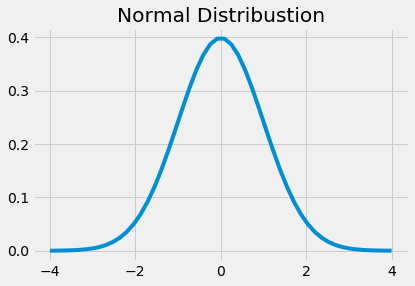

In [116]:
x = np.linspace(-4,4,50)

normal = stats.norm.pdf(x)
plt.plot(x, normal)
plt.title('Normal Distribustion')

As we can observe from the above chart, the distribution is symmetric. Distributions that are not symmetric are called skewed ditributions. <br>

In [78]:
left = stats.lognorm.ppf(0.01, 0.7, loc = -0.1)

In [79]:
right = stats.lognorm.ppf(0.99, 0.7, loc = -0.1)

In [80]:
x = np.linspace(left,right,150)

In [81]:
lognormal = stats.lognorm.pdf(x,0.7)

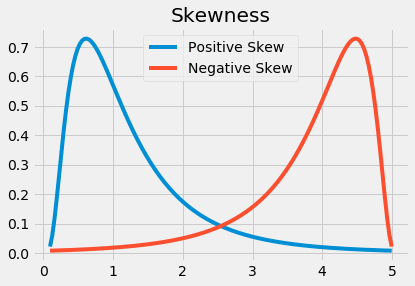

In [87]:
plt.plot(x,lognormal, label = "Positive Skew")
plt.plot(x,lognormal[::-1], label = "Negative Skew")
plt.title("Skewness")
plt.legend()


Plotting real stock market data.

In [88]:
import pandas_datareader as web

In [97]:
spy_price = web.get_data_yahoo('SPY',
                              start = '2012-1-1')

In [98]:
spy_returns = spy_price['Adj Close'].pct_change()[1:]

SPY returns Skewness : -0.408
SPY mean daily returns : 0.00058
SPY median daily returns : 0.00059


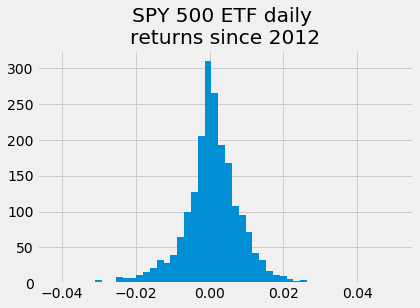

In [113]:
print(f"SPY returns Skewness : {round(stats.skew(spy_returns), 3)}")
print(f"SPY mean daily returns : {round(np.mean(spy_returns), 5)}")
print(f"SPY median daily returns : {round(np.median(spy_returns), 5)}")

plt.hist(spy_returns, bins=50)
plt.title("SPY 500 ETF daily \nreturns since 2012");

In [104]:
round(stats.skew(spy_returns), 3)

-0.408

Kurtosis describe the peak of a distribution. All normal distributions have a kurtosis of 3. Leptokurtic distributions have a kurtosis greater than 3. Platykurtic distribution has kurtosis lower than 3.

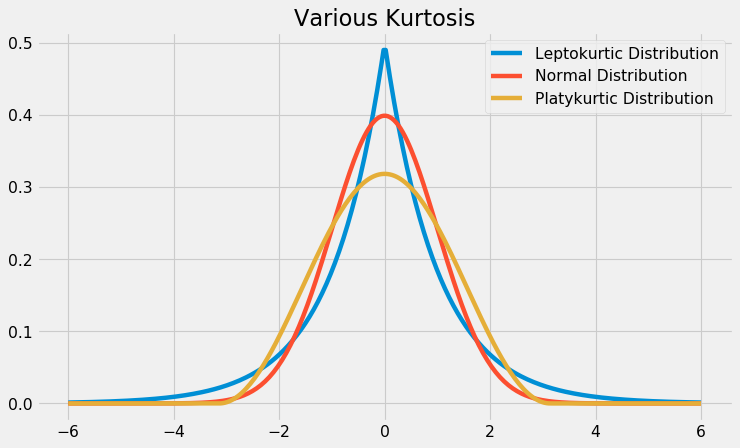

In [136]:
x = np.linspace(-6,6, 300)
normal = stats.norm.pdf(x)
plt.figure(figsize=(10,6), dpi = 80)
plt.plot(x,stats.laplace.pdf(x), label = "Leptokurtic Distribution")
plt.plot(x,normal, label = "Normal Distribution")
plt.plot(x,stats.cosine.pdf(x), label = "Platykurtic Distribution")
plt.title("Various Kurtosis")
plt.legend();

In [139]:
sp_500_k = round(stats.kurtosis(spy_returns),3)
print(f"Excess Kurtosis for S&P 500 returns since 2012 is {sp_500_k}")

Excess Kurtosis for S&P 500 returns since 2012 is 3.385


## Normality Testing using Jarque-Bera test

The Jarque-Bera test can be used to compare whether sample data has skewness and kurtosis similar to the normal distribution. <br>
The JB test's null hypothesis is that the data came from a normal distribution.

Using a 5% cutoff for our p-value we can perform the test as below.

In [194]:
from statsmodels.stats.stattools import jarque_bera

N = 2000
M = 2000
pvalues = np.zeros((N))

for i in range(N):
    X = np.random.normal(0,1,M)
    _,pvalue,_,_ = jarque_bera(X)
    pvalues[i] = pvalue

# Tally number of pvalues below the 0.05 cutoff.    
low_pval = pvalues[pvalues < 0.05]

n_significant = len(low_pval)/N
print(n_significant)

0.0505
